# OVERVIEW OF THE ANALYSIS
Task: 
- Assesing the dataset
- Total sales per Store


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview DF
At the beggining of this analysis, I will check the df in order to figure out if there are any mayor issues before starting my analys.

In [2]:
supermarket = pd.read_csv('supermarket_sales.csv')
supermarket.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
supermarket.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [4]:
supermarket.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [5]:
#Type of data
supermarket.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [14]:
## Unique Values
supermarket.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [276]:
# Null Data
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Total Unit sold per Store
I will assess how many units have been sold in the stores.
First, I check how many store I have in the dataset and then with group by functin I will see how many sold by store.
At the end I will use a bar chart to show the result.

In [17]:
print(supermarket['City'].unique())

['Yangon' 'Naypyitaw' 'Mandalay']


In [342]:
# Unit sold per Store
Totalunitperstore = supermarket.groupby('City')['Quantity'].sum(ascending=True).to_frame().reset_index()
Totalunitperstore

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


### Bar Chart - UNit sold per City

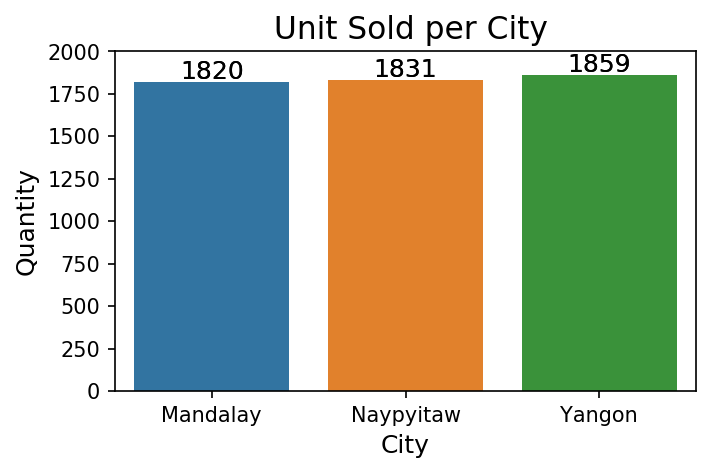

In [278]:
# Size graph
plt.figure(figsize=(5,3), dpi =150)

plt.bar(Totalunitperstore['City'], Totalunitperstore['Quantity'], data = Totalunitperstore)

# Labels X and Y 
plt.xlabel("City Store", size =12)
plt.ylabel("Unit Sold", size = 12)  


plots = sns.barplot(x="City", y="Quantity", data=Totalunitperstore)

# Data on the Bar
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

# Title   
plt.title(" Unit Sold per City", size = 15)

# X and Y Ticks
plt.yticks([0,250,500,750,1000,1250,1500,1750,2000], size= 10)
plt.xticks(size = 10)

plt.show()

## Total Sales per Store - Bar Chart
The group by functin I will see how much sales by store.
At the end I will use a bar chart to show the result.

In [343]:
Totalsalesperstore = supermarket.groupby('City')['Total'].sum(ascending=False).to_frame().reset_index()
Totalsalesperstore

,City,Total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


### Bar Chart - Total Sales per City

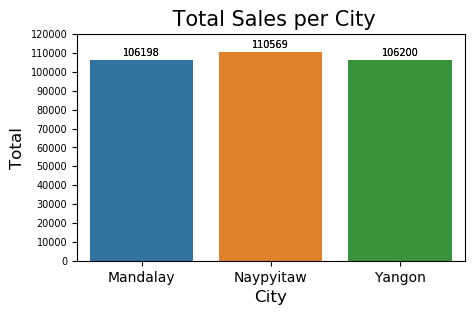

In [321]:
plt.figure(figsize=(5,3), dpi =100)
plt.bar(Totalsalesperstore['City'], Totalsalesperstore['Total'], data = Totalsalesperstore)

plt.xlabel("City Store", size =12)
plt.ylabel("Sales", size = 12)  


plots = sns.barplot(x="City", y="Total", data=Totalsalesperstore)

for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 5),
                   textcoords='offset points')

plt.title(" Total Sales per City", size = 15)
plt.yticks([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000], size= 7)
plt.xticks(size = 10)

plt.show()

## Analysing customers gender - Pie Chart
Number of Customer per Gender

In [3]:
Customergender = supermarket['Gender'].value_counts().to_frame()
Customergender

,Gender
Female,501
Male,499


### Pie Chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


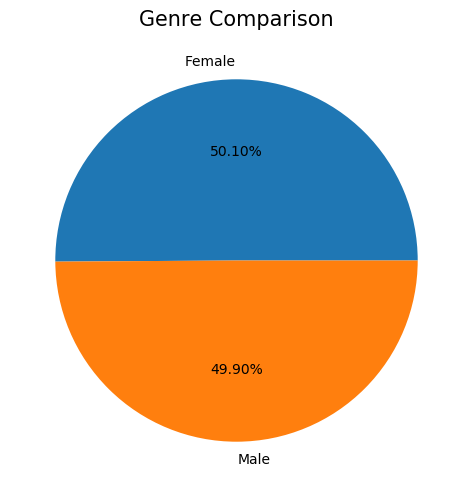

In [5]:
plt.figure(figsize=(10,6), dpi= 100);
plt.pie(Customergender, autopct='%1.2f%%', labels=Customergender.index);

plt.title('Genre Comparison', size = 15);

plt.show();

## Most Sold line products by quatity and Sales - Bar Chart

In [329]:
Productline = supermarket['Product line'].value_counts(ascending=False).to_frame()
Productline

,Product line
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [6]:
# By sales
supermarket.groupby(["Product line"])["Total"].sum(ascending=False).to_frame()


,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


### Graph Product Iine sold

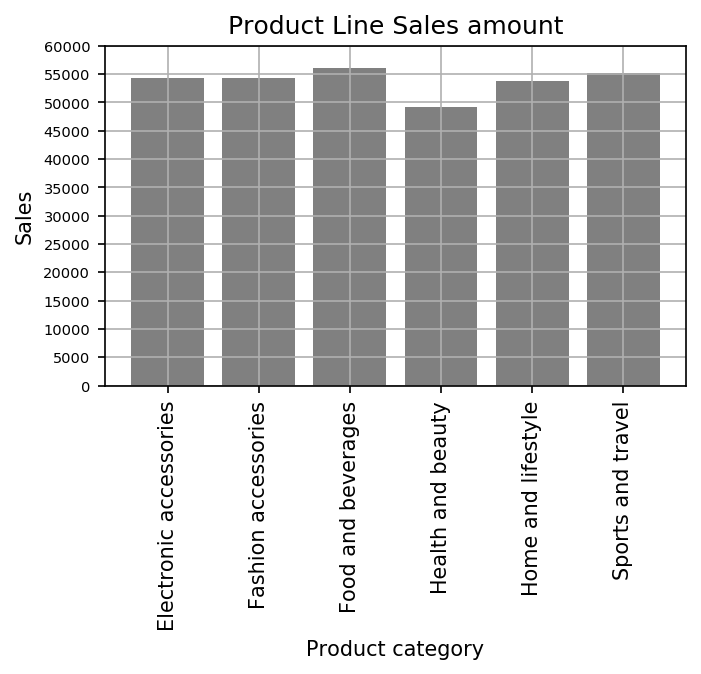

In [324]:
plt.figure(figsize=(5,3), dpi =150)

product_category=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty',
       'Home and lifestyle','Sports and travel']
product_sale=[54337.5315,54305.8950,56144.8440,49193.7390,53861.9130,55122.8265]

plt.bar(product_category,product_sale, color = 'grey')

plt.title(" Product Line Sales amount ")

plt.xlabel('Product category')  
plt.ylabel('Sales')

plt.xticks(rotation = 90)
plt.yticks([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000, 55000, 60000], size= 7)

plt.grid(True)

plt.show()  

## Types of customer

In the next steps I will assess out customer type by different analysis.


### Product line purchased by gender

In [188]:
Productlinegenre = supermarket.groupby('Gender')['Product line'].value_counts().to_frame()
Productlinegenre

Product line
Gender Product line                        
Female Fashion accessories               96
       Food and beverages                90
       Sports and travel                 88
       Electronic accessories            84
       Home and lifestyle                79
       Health and beauty                 64
Male   Health and beauty                 88
       Electronic accessories            86
       Food and beverages                84
       Fashion accessories               82
       Home and lifestyle                81
       Sports and travel                 78

### Types of customer per store

In [192]:
supermarket.groupby(["Gender","City"])["Product line"].value_counts().to_frame()

Product line
Gender City      Product line                        
Female Mandalay  Fashion accessories               33
                 Sports and travel                 30
                 Food and beverages                29
                 Electronic accessories            28
                 Home and lifestyle                22
                 Health and beauty                 20
       Naypyitaw Food and beverages                38
                 Fashion accessories               35
                 Sports and travel                 29
                 Electronic accessories            28
                 Home and lifestyle                25
                 Health and beauty                 23
       Yangon    Home and lifestyle                32
                 Sports and travel                 29
                 Electronic accessories            28
                 Fashion accessories               28
                 Food and beverages                23
                 Health and beauty                 21
Male   Mandalay  Health and beauty                 33
                 Sports and travel                 32
                 Fashion accessories               29
                 Home and lifestyle                28
                 Electronic accessories            27
                 Food and beverages                21
       Naypyitaw Fashion accessories               30
                 Health and beauty                 29
                 Food and beverages                28
                 Electronic accessories            27
                 Home and lifestyle                20
                 Sports and travel                 16
       Yangon    Food and beverages                35
                 Home and lifestyle                33
                 Electronic accessories            32
                 Sports and travel                 30
                 Health and beauty                 26
                 Fashion accessories               23

### Member or Normal Customer

In [229]:
supermarket["Customer type"].value_counts().to_frame()

,Customer type
Member,501
Normal,499


In [338]:
supermarket.groupby(["City","Customer type"])["Gender"].value_counts().to_frame()

Gender
City      Customer type Gender        
Mandalay  Member        Female      85
                        Male        80
          Normal        Male        90
                        Female      77
Naypyitaw Member        Female      96
                        Male        73
          Normal        Female      82
                        Male        77
Yangon    Member        Male        87
                        Female      80
          Normal        Male        92
                        Female      81

## Type fo Payment

In [222]:
supermarket['Payment'].value_counts().to_frame()

,Payment
Ewallet,345
Cash,344
Credit card,311


In [200]:
supermarket.groupby("Payment")["Customer type"].value_counts().to_frame()

Customer type
Payment     Customer type               
Cash        Normal                   176
            Member                   168
Credit card Member                   172
            Normal                   139
Ewallet     Normal                   184
            Member                   161

In [197]:
supermarket.groupby(["Payment","Customer type"])["Gender"].value_counts().to_frame()

Gender
Payment     Customer type Gender        
Cash        Member        Female      90
                          Male        78
            Normal        Female      88
                          Male        88
Credit card Member        Female      90
                          Male        82
            Normal        Female      73
                          Male        66
Ewallet     Member        Female      81
                          Male        80
            Normal        Male       105
                          Female      79

## Satisfaction of our cutomers

In [206]:
supermarket["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

In [315]:
np.arange(0,65000,5000)

array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000, 55000, 60000])

In [ ]:
a = np.array([7,8,6])
a